# Project : Breast Cancer Classification

**Introduction** <br>
Breast cancer remains one of the leading causes of cancer-related deaths among women worldwide.<br>The analysis of medical data and the application of machine learning techniques play an increasingly important role in early detection and diagnosis.<br>In this context, this project aims to develop a binary classification model to predict whether a patient has Coimbra breast cancer or not, based on a set of clinical and biochemical attributes. <br>
**Attributes and Objective** <br>
The data at our disposal includes a variety of attributes, including patient age, body mass index (BMI), glucose levels, insulin, leptin, adiponectin, resistin, as well as MCP-1 concentration, among others. Our target variable is the Coimbra breast cancer classification, which will be used to train and evaluate our classification models. This variable indicates whether a patient is sick (1) or not (0). <br>
**Classification Approaches** <br>
To achieve our objective, we will explore several widely used classification algorithms in the field of machine learning. We plan to use methods such as k-NN (k-nearest neighbors), logistic regression, neural networks, and Naive Bayes classifier. Each of these algorithms presents advantages and metrics that will be taken into account when selecting the final model.<br>
**Project Objectives** <br>
The main objective of this project is to develop an accurate and robust classification model for predicting Coimbra breast cancer. We will seek to compare the performance of different classification algorithms in terms of accuracy, recall, F1-score, and other relevant metrics. Additionally, we will seek to interpret the model results in order to better understand the factors that contribute to breast cancer prediction.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn import neighbors
import seaborn as sns

In [2]:
df=pd.read_csv('dataR2.csv')

df.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


<Axes: title={'center': 'Classification Count'}, xlabel='Classification', ylabel='count'>

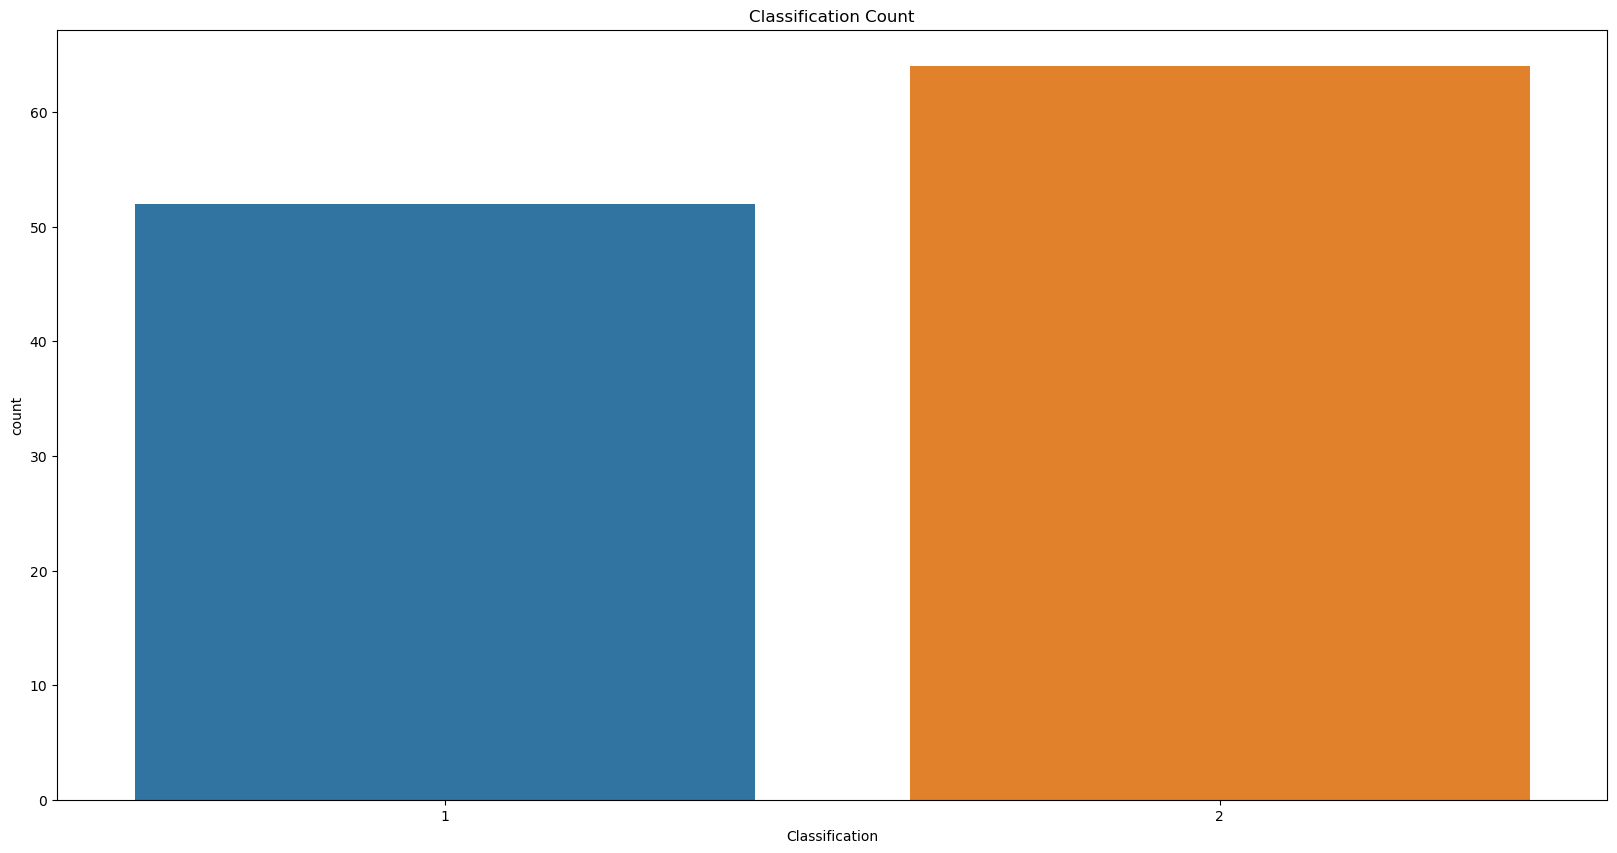

In [3]:
plt.figure(figsize=(20,10))
plt.title('Classification Count')
sns.countplot(data=df, x ='Classification')

<Axes: title={'center': 'Histogram of Age'}, xlabel='Age', ylabel='Count'>

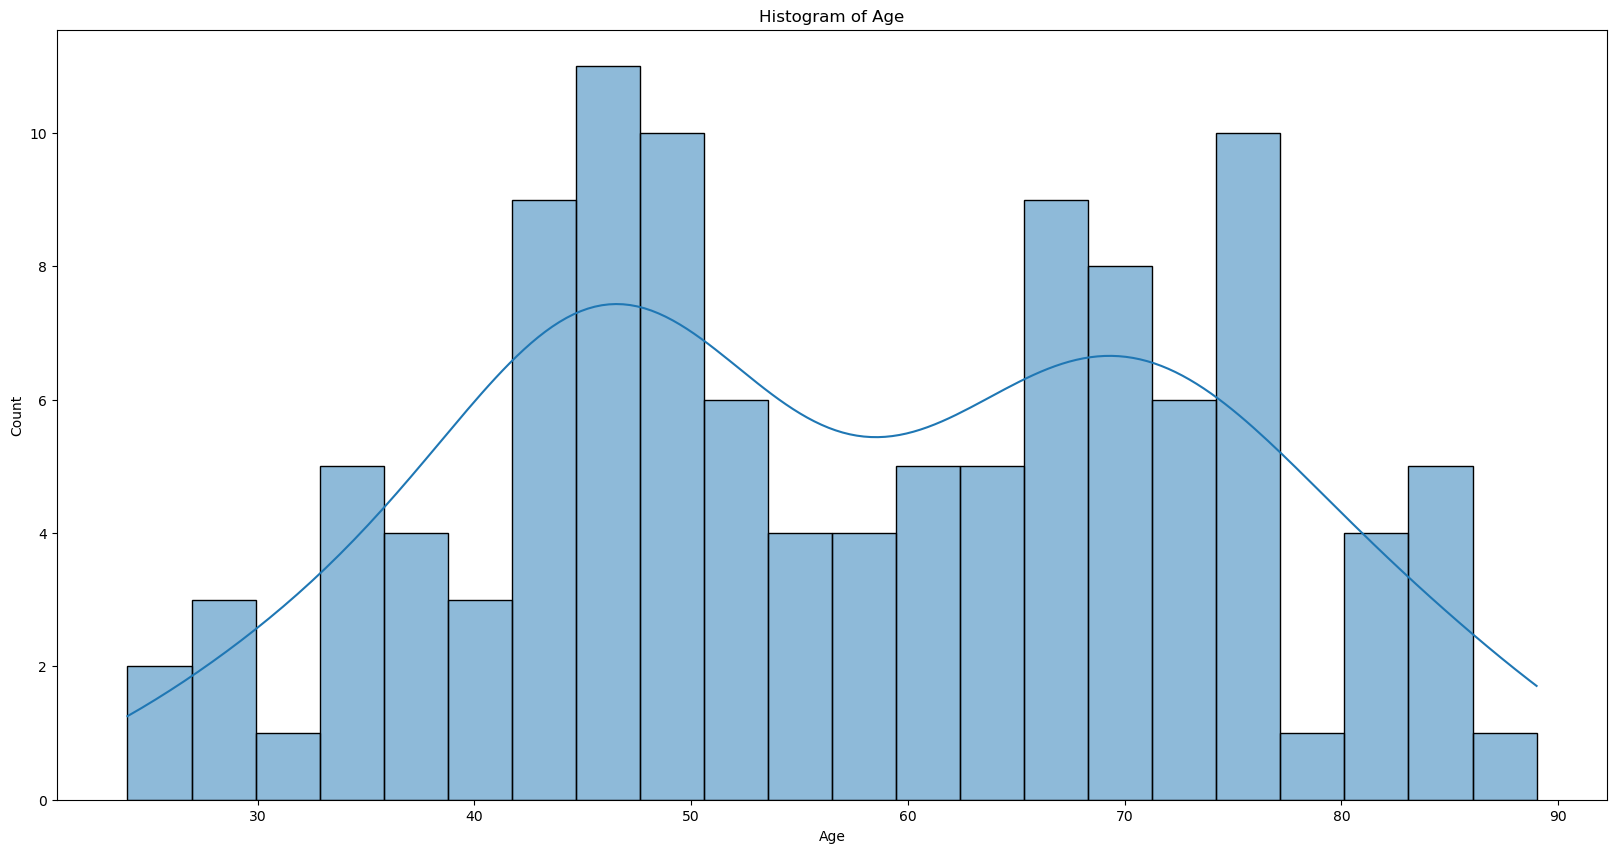

In [4]:
plt.figure(figsize=(20,10))
plt.title('Histogram of Age')
sns.histplot(data=df, x='Age', bins=22, kde=True)

C:\Users\GAMING\AppData\Local\Temp\ipykernel_17072\4240281389.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.Age[df.Classification == 1],color="c",shade=True)
C:\Users\GAMING\AppData\Local\Temp\ipykernel_17072\4240281389.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.Age[df.Classification == 2],color="r",shade=True)


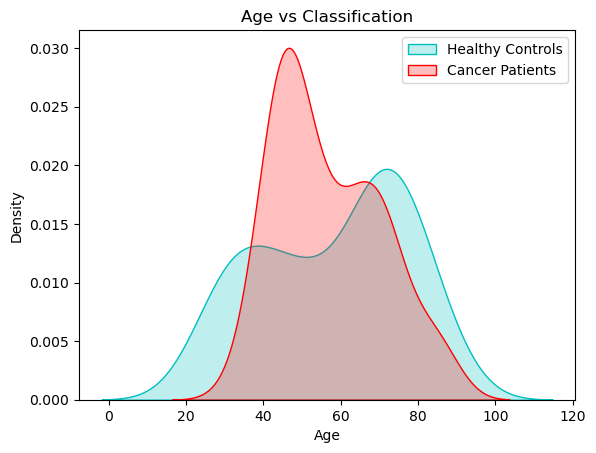

In [5]:
#Probability density curves for individuals' age, distinguished by their classification.
sns.kdeplot(df.Age[df.Classification == 1],color="c",shade=True)
sns.kdeplot(df.Age[df.Classification == 2],color="r",shade=True)
plt.legend(['Healthy Controls', 'Cancer Patients'])
plt.title('Age vs Classification')
plt.show()

C:\Users\GAMING\AppData\Local\Temp\ipykernel_17072\1462488958.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.Glucose[df.Classification == 1],color="c",shade=True)
C:\Users\GAMING\AppData\Local\Temp\ipykernel_17072\1462488958.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.Glucose[df.Classification ==2],color="r",shade=True)


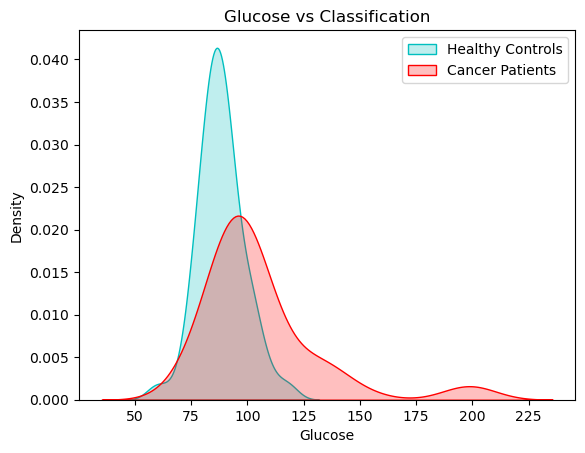

In [6]:
#Probability Density Curves for Glucose Levels by Classification
sns.kdeplot(df.Glucose[df.Classification == 1],color="c",shade=True)
sns.kdeplot(df.Glucose[df.Classification ==2],color="r",shade=True)
plt.legend(['Healthy Controls', 'Cancer Patients'])
plt.title('Glucose vs Classification')
plt.show()

<Axes: title={'center': 'Heatmap'}>

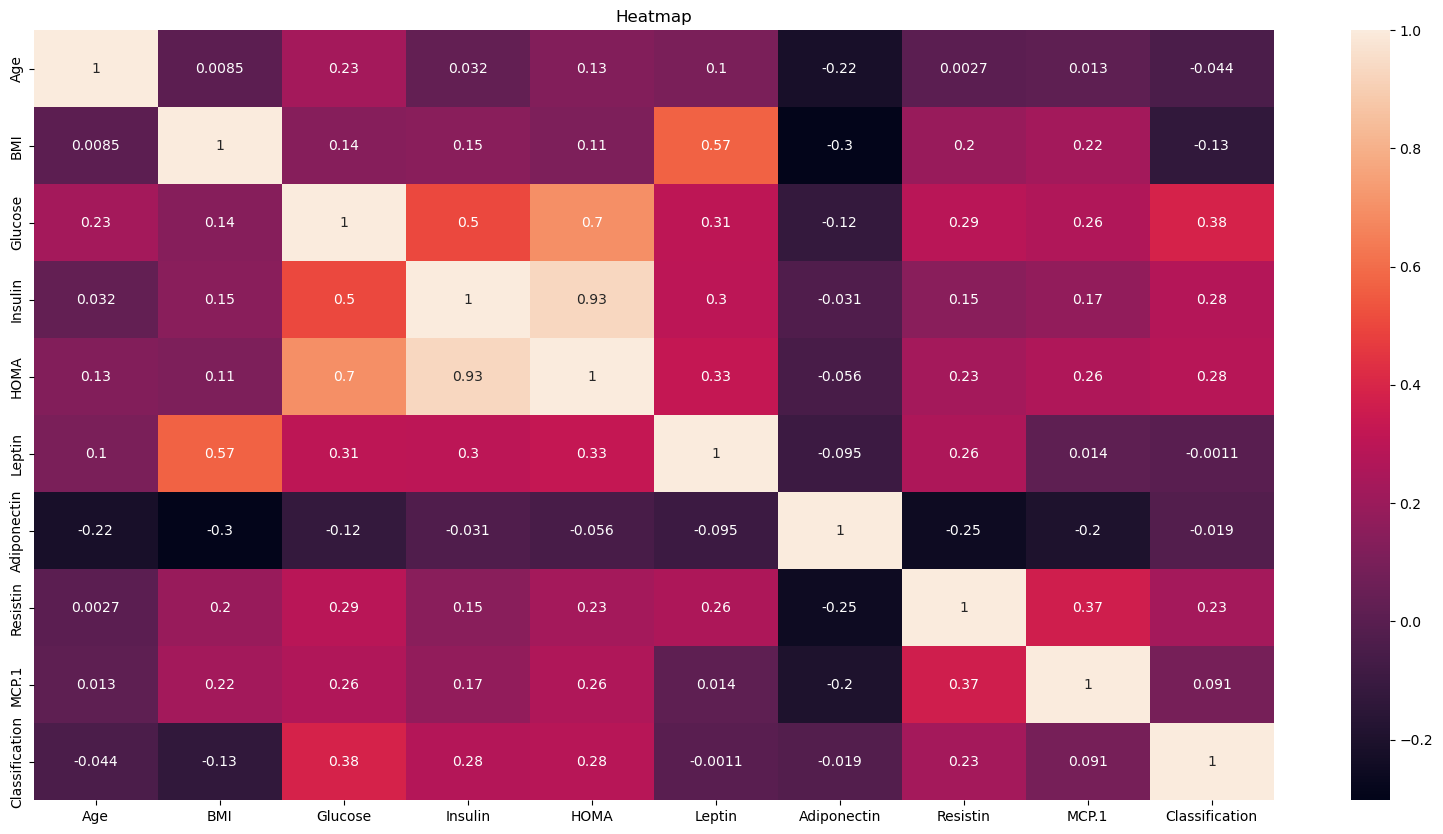

In [7]:
#Correlations between the different columns of the dataframe df
plt.figure(figsize=(20,10))
plt.title('Heatmap')
sns.heatmap(data=df.corr(), annot=True)

<Axes: title={'center': 'Box Plot of the dataset'}>

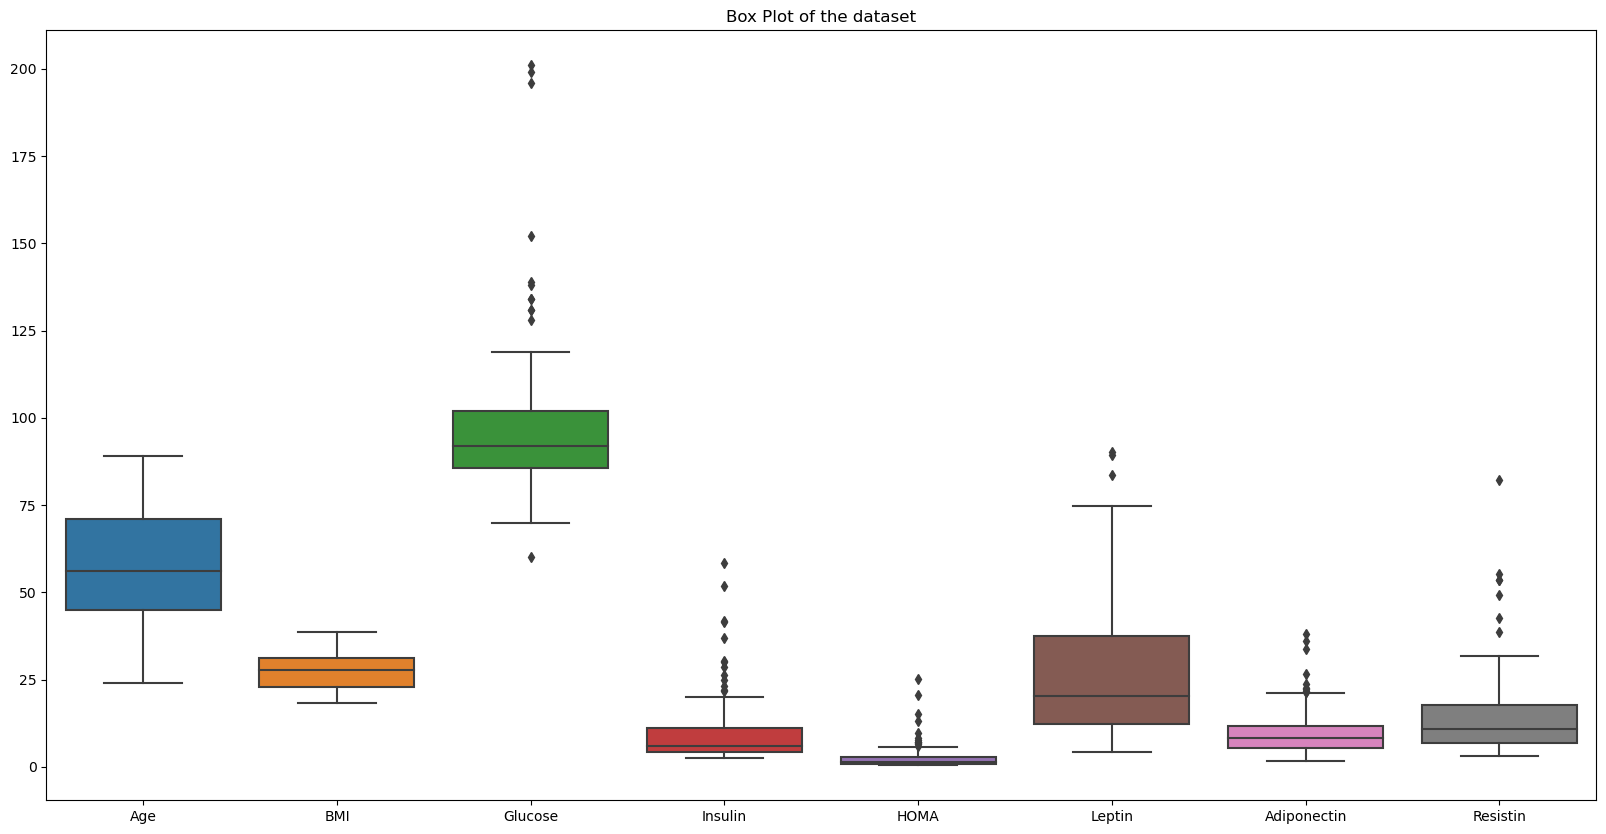

In [8]:
#Boxplots of the features
plt.figure(figsize=(20,10))
plt.title('Box Plot of the dataset')
sns.boxplot(data=df.drop(['MCP.1','Classification'], axis=1))

<Axes: title={'center': 'Box Plot of Glucose'}, xlabel='Glucose'>

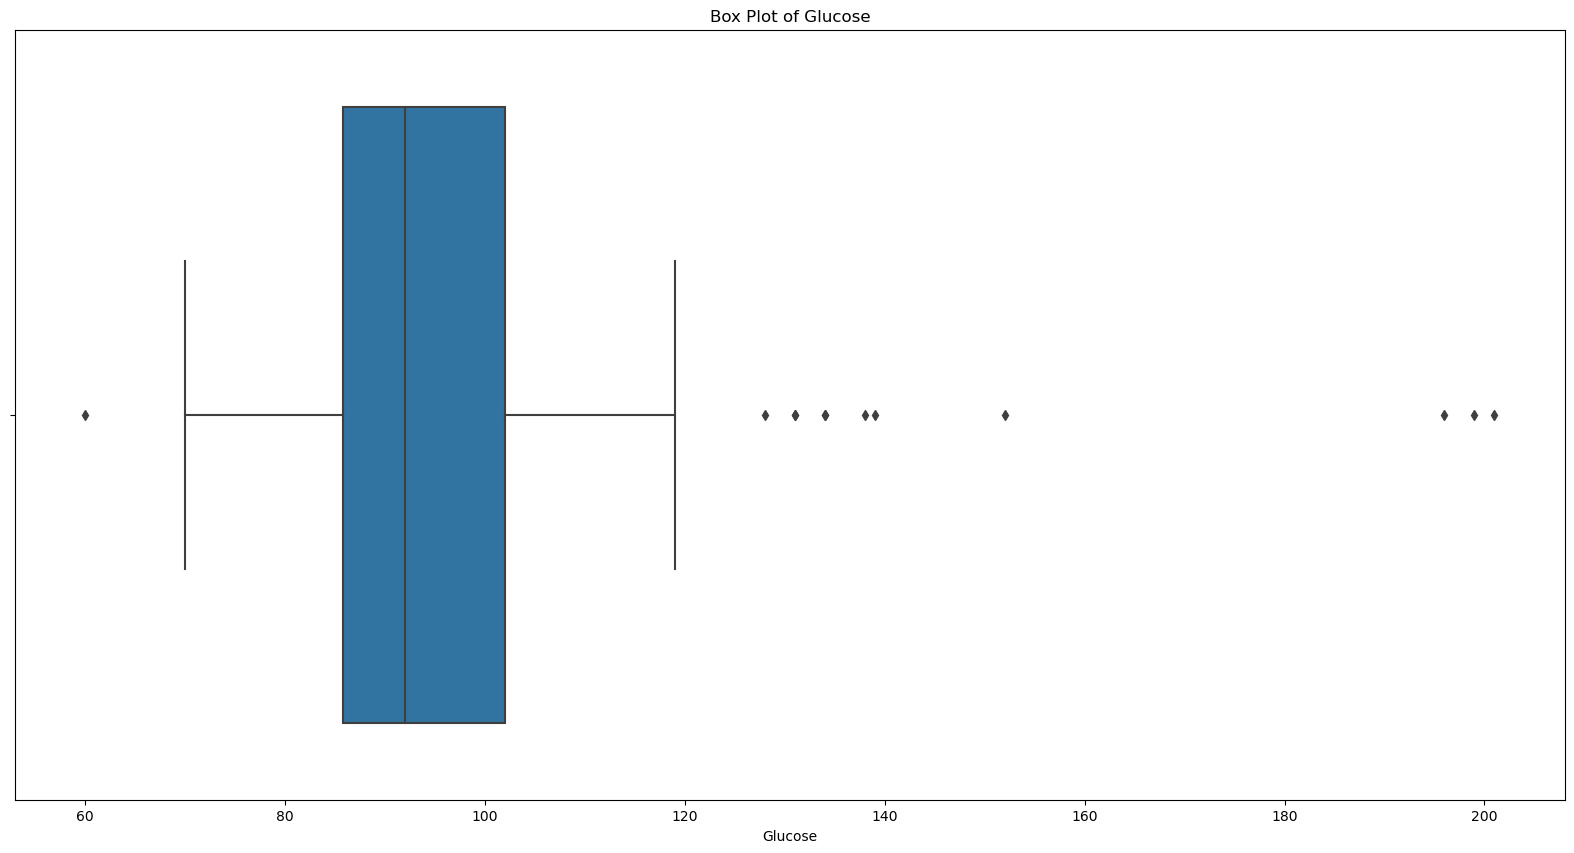

In [9]:
#Boxplot to visualize the distribution of glucose values in the datafram
plt.figure(figsize=(20,10))
plt.title('Box Plot of Glucose')
sns.boxplot(data=df, x='Glucose')

In [10]:
df[(df['Glucose'] < 70) | (df['Glucose'] > 120)]  

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
47,78,25.300000,60,3.508,0.519184,6.6330,10.567295,4.66380,209.749,1
78,86,26.666667,201,41.611,20.630734,47.6470,5.357135,24.37010,1698.440,2
87,85,27.688778,196,51.814,25.050342,70.8824,7.901685,55.21530,1078.359,2
88,48,31.250000,199,12.162,5.969920,18.1314,4.104105,53.63080,1698.440,2
89,58,29.154519,139,16.582,5.685415,22.8884,10.262660,13.97399,923.886,2
90,40,30.836531,128,41.894,13.227332,31.0385,6.160995,17.55503,638.261,2
93,49,32.461911,134,24.887,8.225983,42.3914,10.793940,5.76800,656.393,2
94,60,31.231410,131,30.130,9.736007,37.8430,8.404430,11.50005,396.021,2
105,73,37.109375,134,5.636,1.862886,41.4064,3.335665,6.89235,788.902,2
108,68,35.560000,131,8.150,2.633537,17.8700,11.900000,4.19000,198.400,2


<Axes: title={'center': 'Box Plot of Resistin'}, xlabel='Resistin'>

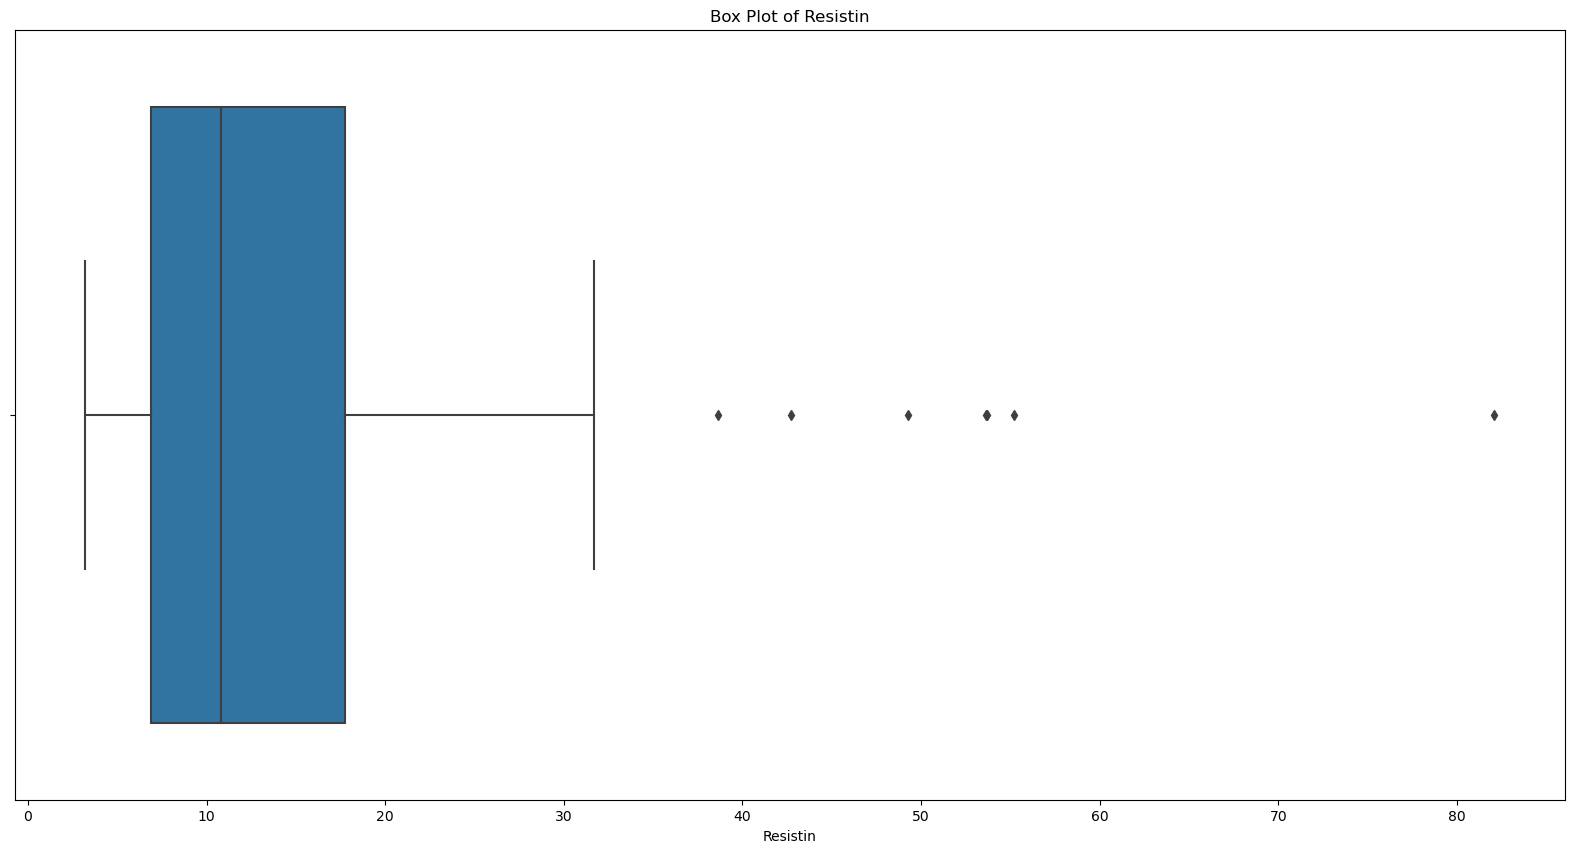

In [11]:
#Boxplot to visualize the distribution of resistin values in the dataframe
plt.figure(figsize=(20,10))
plt.title('Box Plot of Resistin')
sns.boxplot(data=df, x='Resistin')

In [12]:
df[(df['Resistin'] > 35)]

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
37,69,35.092702,101,5.646,1.406607,83.4821,6.796985,82.10000,263.499,1
77,43,31.250000,103,4.328,1.099601,25.7816,12.718960,38.65310,775.322,2
83,71,25.510204,112,10.395,2.871792,19.0653,5.486100,42.74470,799.898,2
84,42,29.296875,98,4.172,1.008511,12.2617,6.695585,53.67170,1041.843,2
87,85,27.688778,196,51.814,25.050342,70.8824,7.901685,55.21530,1078.359,2
88,48,31.250000,199,12.162,5.969920,18.1314,4.104105,53.63080,1698.440,2
98,71,27.915519,104,18.200,4.668907,53.4997,1.656020,49.24184,256.001,2


In [13]:
df[(df['Resistin'] > 80)]

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
37,69,35.092702,101,5.646,1.406607,83.4821,6.796985,82.1,263.499,1


<Axes: title={'center': 'Box Plot of the MCP.1'}, xlabel='MCP.1'>

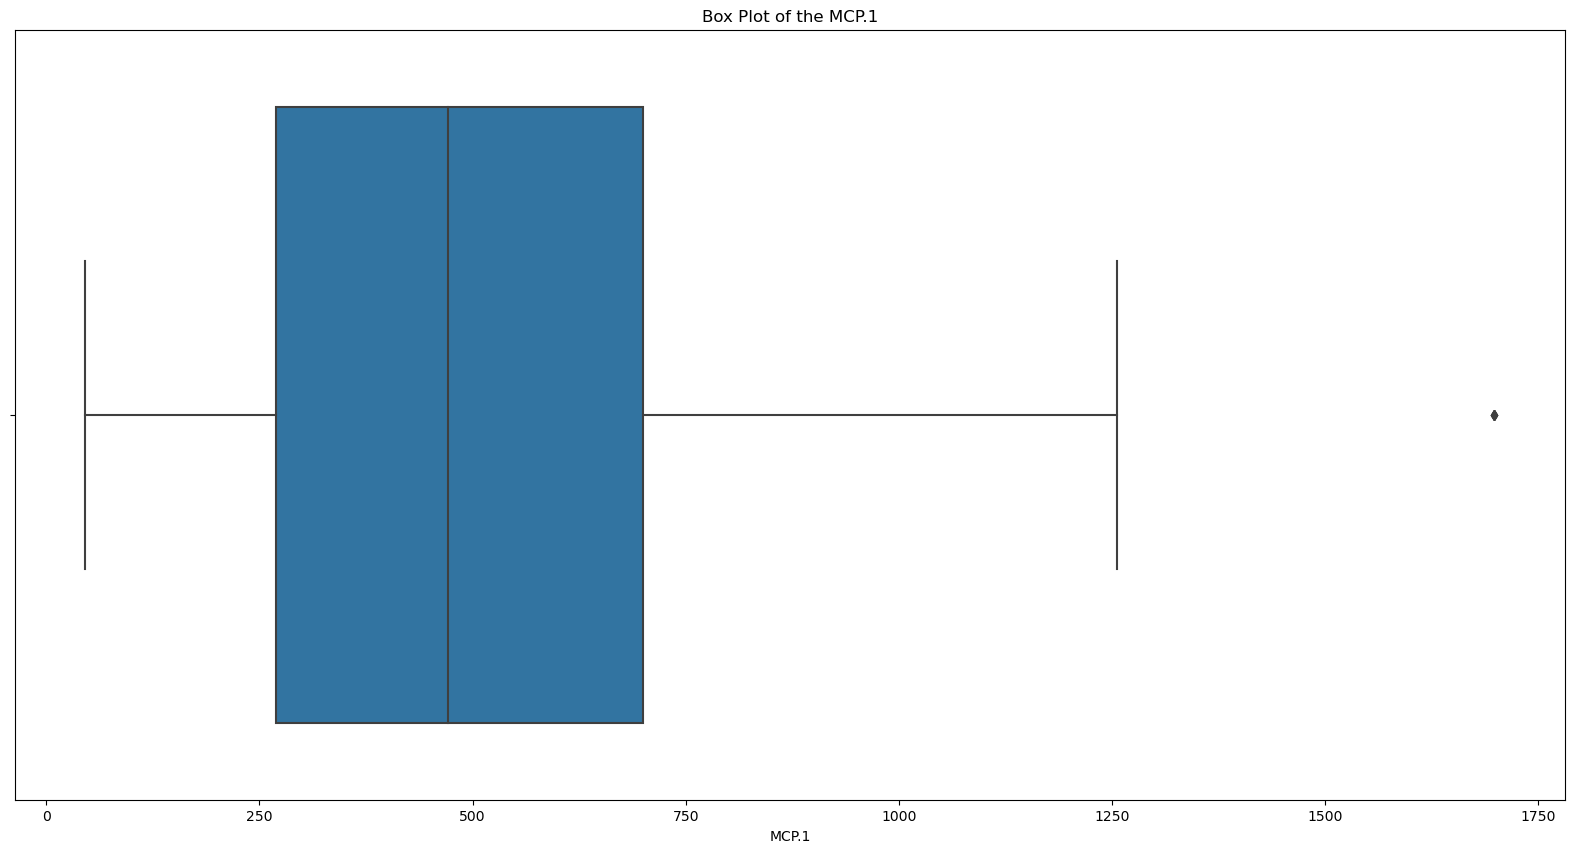

In [14]:
#Boxplot to visualize the distribution of MCP-1 values in the dataframe
plt.figure(figsize=(20,10))
plt.title('Box Plot of the MCP.1')
sns.boxplot(data=df, x='MCP.1')

In [15]:
df[(df['MCP.1'] > 750)].sort_values('MCP.1')

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
92,52,30.801249,87,30.212,6.483495,29.2739,6.268540,24.24591,764.667,2
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
77,43,31.250000,103,4.328,1.099601,25.7816,12.718960,38.65310,775.322,2
79,41,26.672763,97,22.033,5.271762,44.7059,13.494865,27.83250,783.796,2
105,73,37.109375,134,5.636,1.862886,41.4064,3.335665,6.89235,788.902,2
83,71,25.510204,112,10.395,2.871792,19.0653,5.486100,42.74470,799.898,2
75,43,26.562500,101,10.555,2.629602,9.8000,6.420295,16.10000,806.724,2
30,66,36.212279,101,15.533,3.869788,74.7069,7.539550,22.32024,864.968,1
26,50,38.578759,106,6.703,1.752611,46.6401,4.667645,11.78388,887.160,1
22,29,32.270788,84,5.810,1.203832,45.6196,6.209635,24.60330,904.981,1


In [16]:
df[(df['MCP.1'] > 1500)]

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
78,86,26.666667,201,41.611,20.630734,47.6470,5.357135,24.37010,1698.44,2
85,65,29.666548,85,14.649,3.071407,26.5166,7.282870,19.46324,1698.44,2
86,48,28.125000,90,2.540,0.563880,15.5325,10.222310,16.11032,1698.44,2
88,48,31.250000,199,12.162,5.969920,18.1314,4.104105,53.63080,1698.44,2


In [17]:
df = df.drop(df[(df['MCP.1'] > 1500)].index)  #Remove outliers from MCP-1 in the dataframe

In [18]:
df

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2


In [19]:
len(df)

112

In [20]:
y = df.iloc[:,-1].values  #Extract the values from the last column of dataframe df and store them in y (target)
X = df.iloc[:,:-1]        #All columns except the last one are stored in X

In [21]:
y[np.where(y == 1)] = 0 # Label for healthy individuals
y[np.where(y == 2)] = 1 # Label for affected individuals
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

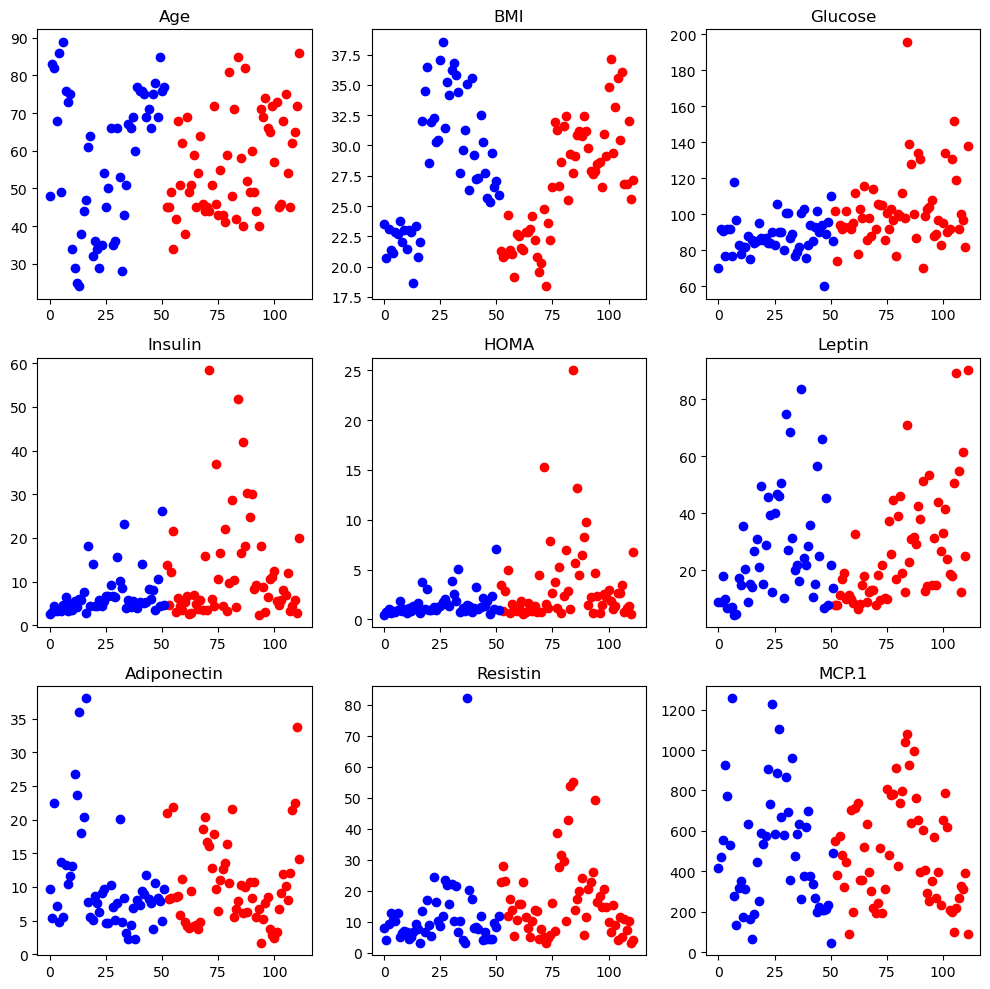

In [22]:
fig = plt.figure(figsize=(10,10))
#Scatter Plots: Red Points = Cancer (Class 1), Blue Points = Non-Cancer (Class 0)
for index, feature in enumerate(X,1):
    plt.subplot(3, 3, index)
    plt.scatter(np.arange(112)[y==1], X[feature][y==1], c='r')
    plt.scatter(np.arange(112)[y==0], X[feature][y==0], c='b')
    plt.title(feature)
    
fig.tight_layout()
plt.show()

In [23]:
X.mean(axis=0)

Age             57.142857
BMI             27.534077
Glucose         96.151786
Insulin          9.736071
HOMA             2.521273
Leptin          26.602873
Adiponectin     10.303705
Resistin        14.237836
MCP.1          493.082964
dtype: float64

In [24]:
def unison_shuffle(a, b):
  #Create shuffled indices array for consistent shuffling of x and y
  inx = np.random.permutation(a.shape[0])  
  return a.iloc[inx].reset_index(drop=True), b[inx]

In [25]:
X, y = unison_shuffle(X, y)

In [26]:
X

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,76,29.218408,83,5.376,1.100646,28.5620,7.369960,8.04375,698.789
1,29,23.010000,82,5.663,1.145436,35.5900,26.720000,4.58000,174.800
2,43,31.250000,103,4.328,1.099601,25.7816,12.718960,38.65310,775.322
3,43,34.422174,89,23.194,5.091856,31.2128,8.300955,6.71026,960.246
4,60,31.231410,131,30.130,9.736007,37.8430,8.404430,11.50005,396.021
...,...,...,...,...,...,...,...,...,...
107,71,27.915519,104,18.200,4.668907,53.4997,1.656020,49.24184,256.001
108,53,36.790166,101,10.175,2.534932,27.1841,20.030000,10.26309,695.754
109,38,23.340000,75,5.782,1.069670,15.2600,17.950000,9.35000,165.020
110,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114


# Machine Learning 

In [27]:
#Split the X and y data into training sets (X_train, Y_train) and test sets (X_test, Y_test)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [28]:
#Normalize the training (X_train) and test (X_test) data using the fit_transform method on the training set and the transform method on the test set
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# KNN

### KNN Model with Metrics

train score: 0.8333333333333334
test score:  0.6785714285714286


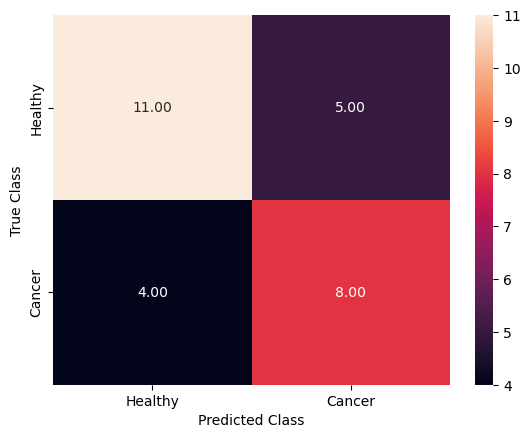

In [153]:
kn_model = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
kn_model.fit(X_train, Y_train)
Y_pred = kn_model.predict(X_test)

print('train score: '+str(kn_model.score(X_train,Y_train)))
print('test score:  '+str(kn_model.score(X_test,Y_test)))

cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot = True, fmt = '.2f', 
            xticklabels = ['Healthy', 'Cancer'], yticklabels = ['Healthy', 'Cancer'])
pl.ylabel('True Class')
pl.xlabel('Predicted Class')
pl.show()

In [176]:
from sklearn.metrics import roc_auc_score, roc_curve

if len(set(Y_test)) == 2:
    Y_prob = kn_model.predict_proba(X_test)[:, 1]  
    auc_roc1 = roc_auc_score(Y_test, Y_prob)
    print('AUC-ROC:', auc_roc1)

AUC-ROC: 0.75


In [155]:
print('Classification Report:')
print(classification_report(Y_test, Y_pred, target_names=['Healthy', 'Cancer']))


Classification Report:
              precision    recall  f1-score   support

     Healthy       0.73      0.69      0.71        16
      Cancer       0.62      0.67      0.64        12

    accuracy                           0.68        28
   macro avg       0.67      0.68      0.67        28
weighted avg       0.68      0.68      0.68        28



### Hyperparameter Tuning 

In [157]:
grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)

In [159]:
g_res = gs.fit(X_train, Y_train)
g_res.best_score_

Fitting 3 folds for each of 36 candidates, totalling 108 fits


0.7857142857142857

In [160]:
g_res.best_params_

{'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}

In [162]:
knn = KNeighborsClassifier(n_neighbors = 7, weights = 'distance',algorithm = 'brute',metric = 'manhattan')
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='brute', metric='manhattan', n_neighbors=7,
                     weights='distance')

In [166]:
from sklearn import metrics
y_hat = knn.predict(X_train)
y_knn = knn.predict(X_test)
print('Training set accuracy: ', metrics.accuracy_score(Y_train, y_hat))
print('Test set accuracy: ',metrics.accuracy_score(Y_test, y_knn))


Training set accuracy:  1.0
Test set accuracy:  0.75


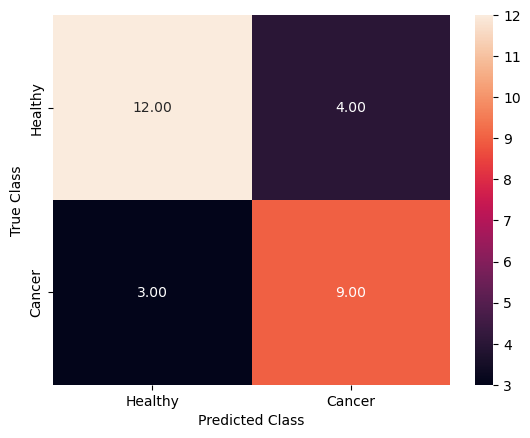

In [171]:
cm = confusion_matrix(Y_test, y_knn)
sns.heatmap(cm, annot = True, fmt = '.2f', 
            xticklabels = ['Healthy', 'Cancer'], yticklabels = ['Healthy', 'Cancer'])
pl.ylabel('True Class')
pl.xlabel('Predicted Class')
pl.show()

In [175]:
if len(set(Y_test)) == 2:
    Y_prob = knn.predict_proba(X_test)[:, 1]  
    auc_roc_knn = roc_auc_score(Y_test, Y_prob)
    print('AUC-ROC:', auc_roc_knn)

AUC-ROC: 0.7395833333333334


In [173]:
print('Classification Report:')
print(classification_report(Y_test, y_knn, target_names=['Healthy', 'Cancer']))


Classification Report:
              precision    recall  f1-score   support

     Healthy       0.80      0.75      0.77        16
      Cancer       0.69      0.75      0.72        12

    accuracy                           0.75        28
   macro avg       0.75      0.75      0.75        28
weighted avg       0.75      0.75      0.75        28



# Logistic Regression

Train score: 0.7619047619047619
Test score: 0.8214285714285714


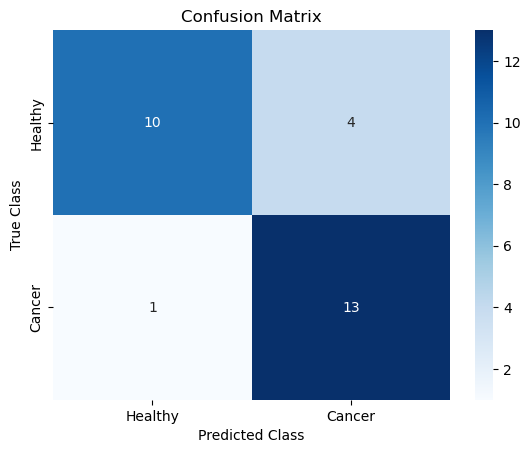

In [227]:
# Define and train the Logistic Regression model
from sklearn.metrics import roc_auc_score, roc_curve

lr_model = LogisticRegression(random_state=0)
lr_model.fit(X_train, Y_train)
y_pred = lr_model.predict(X_test)

# Print train and test scores
print('Train score:', lr_model.score(X_train, Y_train))
print('Test score:', lr_model.score(X_test, Y_test))

# Confusion matrix
cm = confusion_matrix(Y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Healthy', 'Cancer'], yticklabels=['Healthy', 'Cancer'])
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.title('Confusion Matrix')
plt.show()

In [228]:
if len(set(Y_test)) == 2:
    y_prob = lr_model.predict_proba(X_test)[:, 1]
    auc_roc = roc_auc_score(Y_test, y_prob)
    print('AUC-ROC:', auc_roc)

AUC-ROC: 0.923469387755102


### Hyperparameter Tuning for Logistic Regression

In [229]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

#Parameter Grid Definition with Wider Intervals
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': uniform(loc=0, scale=4),  #Use of Uniform Distribution for C
    'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 1000, 2500, 5000]
}

#Initialize RandomizedSearchCV
clf = RandomizedSearchCV(lr_model, param_distributions=param_grid, n_iter=100, cv=3, verbose=True, n_jobs=-1)

#Executing random search on training data
best_clf = clf.fit(X_train, Y_train)

#Display of the best hyperparameters found
print(best_clf.best_estimator_)

#Model Training with Best Hyperparameters
lr = best_clf.best_estimator_
lr.fit(X_train, Y_train)

#Making Predictions on Test Data
y_pred2 = lr.predict(X_test)

#Score Display
print('Train score:', lr.score(X_train, Y_train))
print('Test score:', lr.score(X_test, Y_test))


Fitting 3 folds for each of 100 candidates, totalling 300 fits
LogisticRegression(C=0.9540673738088845, penalty='l1', random_state=0,
                   solver='liblinear')
Train score: 0.75
Test score: 0.8571428571428571


C:\Users\GAMING\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
129 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
21 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\GAMING\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\GAMING\anaconda3\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\GAMING\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1169, in fit
    solv

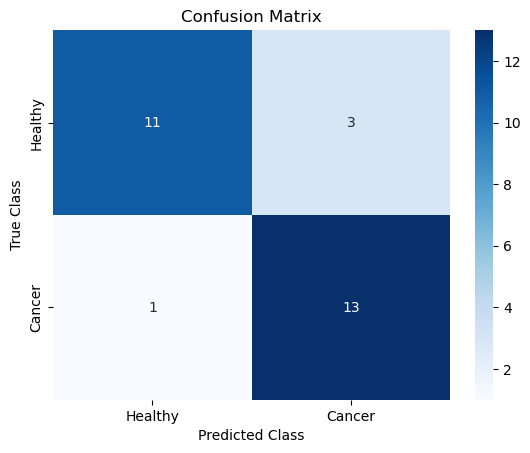

In [230]:
cm = confusion_matrix(Y_test, y_pred2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Healthy', 'Cancer'], yticklabels=['Healthy', 'Cancer'])
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.title('Confusion Matrix')
plt.show()

In [231]:
print('Classification Report:')
print(classification_report(Y_test, y_pred2, target_names=['Healthy', 'Cancer']))


Classification Report:
              precision    recall  f1-score   support

     Healthy       0.92      0.79      0.85        14
      Cancer       0.81      0.93      0.87        14

    accuracy                           0.86        28
   macro avg       0.86      0.86      0.86        28
weighted avg       0.86      0.86      0.86        28



In [232]:
if len(set(Y_test)) == 2:
    y_prob = lr.predict_proba(X_test)[:, 1]
    auc_roc = roc_auc_score(Y_test, y_prob)
    print('AUC-ROC:', auc_roc)

AUC-ROC: 0.9285714285714286


# Naive Bayes

Train score: 0.7380952380952381
Test score: 0.6785714285714286


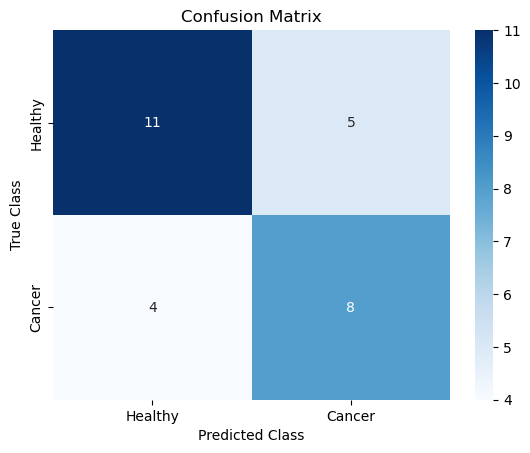

In [273]:
# Define and train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, Y_train) 
y_pred = nb_model.predict(X_test)

# Print train and test scores
print('Train score:', nb_model.score(X_train, Y_train))
print('Test score:', nb_model.score(X_test, Y_test))

# Confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Healthy', 'Cancer'], yticklabels=['Healthy', 'Cancer'])
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.title('Confusion Matrix')
plt.show()

In [274]:
print('Classification Report:')
print(classification_report(Y_test, y_pred, target_names=['Healthy', 'Cancer']))


Classification Report:
              precision    recall  f1-score   support

     Healthy       0.68      0.81      0.74        16
      Cancer       0.67      0.50      0.57        12

    accuracy                           0.68        28
   macro avg       0.68      0.66      0.66        28
weighted avg       0.68      0.68      0.67        28



In [275]:
# Check if the test set is binary for ROC AUC
if len(set(Y_test)) == 2:
    y_prob = nb_model.predict_proba(X_test)[:, 1]
    auc_roc = roc_auc_score(Y_test, y_prob)
    print('AUC-ROC:', auc_roc)

AUC-ROC: 0.6354166666666667


### Hyperparameter Tuning

In [276]:
from sklearn.model_selection import RepeatedStratifiedKFold
np.logspace(0,-9, num=10)
cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=999)

In [277]:
from sklearn.preprocessing import PowerTransformer
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=model, 
                     param_grid=params_NB, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')

Data_transformed = PowerTransformer().fit_transform(X_test) #Transform Data Toward Normal Distribution

gs_NB.fit(Data_transformed, Y_test);

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


In [278]:
gs_NB.best_params_

{'var_smoothing': 0.23101297000831597}

In [279]:
gs_NB.best_score_

0.78

In [280]:
results_NB = pd.DataFrame(gs_NB.cv_results_['params'])
results_NB['test_score'] = gs_NB.cv_results_['mean_test_score']

In [281]:
# predict the target on the test dataset
predict_test = gs_NB.predict(Data_transformed)

# Accuracy Score on test dataset
accuracy_test = accuracy_score(Y_test,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

accuracy_score on test dataset :  0.8928571428571429


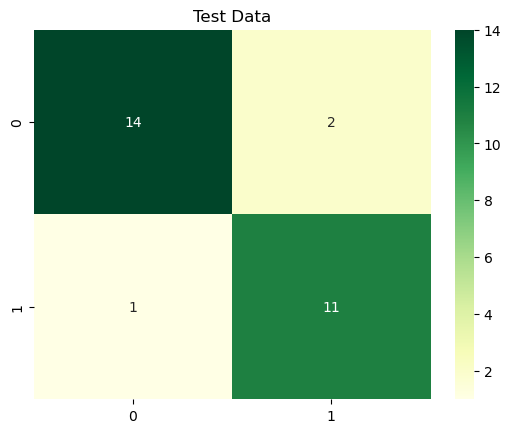

In [282]:
sns.heatmap((metrics.confusion_matrix(Y_test,predict_test)),annot=True,fmt='.5g',cmap="YlGn").set_title('Test Data');

In [283]:
print('Classification Report:')
print(classification_report(Y_test, predict_test, target_names=['Healthy', 'Cancer']))


Classification Report:
              precision    recall  f1-score   support

     Healthy       0.93      0.88      0.90        16
      Cancer       0.85      0.92      0.88        12

    accuracy                           0.89        28
   macro avg       0.89      0.90      0.89        28
weighted avg       0.90      0.89      0.89        28



# Neural Network

Epoch [100/2000], Loss: 0.5145
Epoch [200/2000], Loss: 0.4866
Epoch [300/2000], Loss: 0.4783
Epoch [400/2000], Loss: 0.4753
Epoch [500/2000], Loss: 0.4737
Epoch [600/2000], Loss: 0.4726
Epoch [700/2000], Loss: 0.4715
Epoch [800/2000], Loss: 0.4706
Epoch [900/2000], Loss: 0.4697
Epoch [1000/2000], Loss: 0.4689
Epoch [1100/2000], Loss: 0.4682
Epoch [1200/2000], Loss: 0.4677
Epoch [1300/2000], Loss: 0.4674
Epoch [1400/2000], Loss: 0.4672
Epoch [1500/2000], Loss: 0.4671
Epoch [1600/2000], Loss: 0.4670
Epoch [1700/2000], Loss: 0.4670
Epoch [1800/2000], Loss: 0.4670
Epoch [1900/2000], Loss: 0.4670
Epoch [2000/2000], Loss: 0.4670
Accuracy: 75.00%


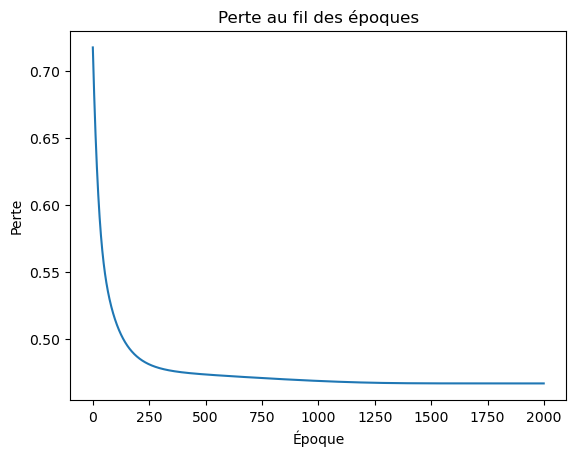

In [29]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Convert data to tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
Y_train_tensor = torch.tensor(Y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
Y_test_tensor = torch.tensor(Y_test, dtype=torch.float32).view(-1, 1)

#Set dimensions
input_dim = 9  #Number of features
output_dim = 1  #Single output for logistic regression

#Define model 
model = nn.Sequential(
    nn.Linear(input_dim, output_dim),  # Linear layer
    nn.Sigmoid()  #Sigmoid activation function
)

#Define loss and optimizer
criterion = nn.BCELoss()  #Cross-entropy binary classification loss
optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=1e-5)  #Adam optimizer with L2 regularization
#weight decay: L2 is a technique to avoid overfitting by adding a penalty proportional to the sum of the squares of the weights to the loss function


num_epochs = 2000  #number of epochs

#Train the model
losses = []
for epoch in range(num_epochs):
    model.train()

    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, Y_train_tensor)
    
    # Backward pass and optimisation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

    #Store loss for visualization
    losses.append(loss.item())

#Model evaluation
model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor)
    predicted_classes = predictions.round()
    
    accuracy = (predicted_classes.eq(Y_test_tensor).sum().item()) / Y_test_tensor.size(0)
    print(f'Accuracy: {accuracy * 100:.2f}%')

#Visualizing loss over time
plt.plot(range(num_epochs), losses)
plt.xlabel('Époque')
plt.ylabel('Perte')
plt.title('Perte au fil des époques')
plt.show()


# Cost function logistic regression

In [135]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cost_log_likelihood(X, y, w, b):
    m = X.shape[0]
    z = np.dot(X, w) + b
    cost = -1/m * np.sum(y * np.log(sigmoid(z)) + (1 - y) * np.log(1 - sigmoid(z)))
    return cost

In [136]:
print ("les parametre de la regression logistique de sklearn est : ", 

       lr_model.coef_, lr_model.intercept_)

les parametre de la regression logistique de sklearn est :  [[-0.31680158 -0.43036034  1.09181074  0.33312012  0.31404257 -0.07351091
   0.0364574   0.65165834  0.07602505]] [0.41260969]


In [137]:
import time

def GD_logistic_reg(X, y, num_steps, learning_rate):
    start = time.time()
    m, n = X.shape
    w = np.zeros(n)
    b = 0
    
    for step in range(num_steps):
        z = np.dot(X, w) + b
        predictions = sigmoid(z)
        error = predictions - y
        
        grad_w = np.dot(X.T, error) / m
        grad_b = np.sum(error) / m
        
        w -= learning_rate * grad_w
        b -= learning_rate * grad_b
        
        if step % 10000 == 0:
            cost = cost_log_likelihood(X, y, w, b)
            print(f'Step {step}: Cost {cost}')
    
    end = time.time()
    duration = end - start

    return w, b, duration

In [128]:
w_GD,b_GD,time=GD_logistic_reg(X_test, Y_test, num_steps=100000, learning_rate=5e-5)


print ("Les paramètres de la régression logistique par GD sont : ", w_GD,b_GD)
print("Temps dexcution",time)

19.40167923608973
7.550175076769001
5.842213885925187
4.986136962635614
4.42560773187148
4.012606358460209
3.6874451139739826
3.4205616294273935
3.1952884150429375
3.0013145444885616
Les paramètres de la régression logistique par GD sont :  [-0.64859184 -1.71918688  4.35865486  2.32675687  1.79502005 -0.88076901
 -0.89946354  1.63711448 -1.35333949] 1.3618420476789643
Temps dexcution 3.1431896686553955


In [129]:
w_GD

array([-0.64859184, -1.71918688,  4.35865486,  2.32675687,  1.79502005,
       -0.88076901, -0.89946354,  1.63711448, -1.35333949])

In [130]:
b_GD

1.3618420476789643

In [138]:
z = np.dot(X_test, w_GD) + b_GD
    
#Application of the sigmoid function
probabilities = sigmoid(z)
    
#Make predictions (0 or 1)
predictions = (probabilities >= 0.5).astype(int)

In [139]:
def calculate_accuracy(y_true, y_pred):
    #Check that the dimensions are the same
    assert y_true.shape == y_pred.shape, "The dimensions of y_true and y_pred must be the same"

    #Calculates the number of correct predictions
    correct_predictions = np.sum(y_true == y_pred)

    #Calculates accuracy
    accuracy = correct_predictions / len(y_true)

    return accuracy

In [140]:
calculate_accuracy(Y_test, predictions)

0.9642857142857143

# General conclusion

After training and evaluating four different models (KNN, logistic regression, neural network, and Naive Bayes) for breast cancer classification, we found that the Naive Bayes model presents the best performance in terms of prediction accuracy on the test set after adjusting the hyperparameter.

This model demonstrated a higher capacity to distinguish between breast cancer cases and healthy cases compared to the other tested models.

However, the Naive Bayes model does not rely on minimizing a specific cost function during training, as it uses a simple probabilistic approach based on Bayes' theorem. Although this approach is often effective in many cases, it may not be as flexible as logistic regression for capturing complex relationships between features and the target.

For this reason, we chose to minimize the cost function associated with logistic regression, as it manages to find a compromise between very good prediction accuracy and a well-defined cost function.

After minimizing the cost function using the gradient descent method, we find that logistic regression now provides the best result with an accuracy of 96%.